# Dairy Feed Analysis  
## (Hypothesis Testing & Cost-Benefit Analysis)

### Experimental Design

* In order to perform hypothesis testing, I chose to create a mock dataset that focuses on a hypothetical dairy farm. The dairy farm is a mid-size operation with 372 lactating cows and they are trying to increase their profitability by either cutting costs or increasing milk production. The local feed mill offered to add a new feed additive to their mix to increase milk production but it comes with an extra cost of \\$50 per ton. To determine if it is worth the cost, the dairy farm decided to test the new feed out on a portion of their herd.
* Due to space and facility constraints, they were only able to break cows into two groups. The experiment was set up to record the milk production of the cows the day before the feed change and then record it again after they received the feed for a week's duration. The need to wait a week's time was due to the nature of dairy farming. A change in feed will not necessarily affect a cow's milk production imediately, so allowing the treatment group to eat the feed for a week was determined to be enough time for their milk production to be satisfactorily affected by the feed additive.
* The herd was split into the following groups:
    * Treatment Group: Approximately 25% of the herd was chosen (at random) to receive the new feed additive
    * Control Group: The remaining ~75% of the herd did not receive the additive in their feed

#### Hypotheses

###### Null Hypothesis 
$H_0: p_x = p_0$
* The old feed and the new feed have the same effect on a cow's milk production. This is essentially saying that there is no difference between the two feeds.

##### Alternative Hypothesis
$H_1: p_x \neq p_0$
* The old feed and the new feed have differing effects on a cow's milk production. This is saying that one type of feed is better than the other. In the case of this experiment, the farmer is hoping the feed with the new additive is better.

#### Assumptions/Success Determinations

1) It is assumed that the two groups of cows will be similarily affected by all other extraneous factors. For example, a cow's health, comfort, the weather, the time of year, etc. can all affect a cow's milk production. Since both groups of cows are on the same farm and the feed experiment is happening over the same week, it is assumed that all else remains equal.  
2) The results of this experiment will be determined using a significance level of 0.05. In other words, the p-value would need to be less than 0.05 to be considered statistically significant.   
3) The increase in milk production must be substantial enough to make the extra \\$50 per ton worth the farmer's time. This will be estimated at the end of the experiment using a milk price of \\$15.00 cwt.  

### Settings/Functions
Read in settings and functions.

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import scipy as sp
from scipy.stats import zscore
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import ttest_ind, ttest_rel, shapiro
import sys
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Data

In [70]:
# Import dataset
data_loc = 'C://Users/User/Documents/GitHub/Python/Dairy Feed Analysis/'
data = pd.read_csv(data_loc+'dairy_data.csv')

In [71]:
data.head()

,id_tag,group,lactation,time,lbs_milk
0,22,control,5,after,65.987920
1,59,control,4,after,63.668600
2,90,control,2,after,78.158056
3,144,control,5,after,75.672886
4,193,control,1,after,99.385129


## Describing the Data

### Variables

1) *id_tag -* the identification number of the cow  
2) *group -* the group that the cow was placed in at random (control vs treatment)  
3) *lactation -* the lactation that the cow is currently on  
4) *lbs_milk -* the pounds of milk that the cow produced  
5) *time -* the time that the milk production was recorded during (either before or after the feed was changed)  

### Data Shape

In [72]:
print("data shape: {}".format(data.shape))

data shape: (744, 5)


### Data Type

 - The data set contains the following data types:
    - Character (2)
    - Integer (2)
    - Numeric (1)

In [73]:
print("data types: {}".format(data.dtypes.value_counts()))

data types: int64      2
object     2
float64    1
dtype: int64


## Exploring the Data

In [74]:
def null_counts(df):
    null_df = pd.DataFrame(df.isnull().sum(),columns=['null_count'])
    null_df['null_fraction'] = null_df['null_count'] / df.shape[0]
    null_df = null_df.sort_values('null_count',ascending=False)
    return null_df

In [75]:
# Checking for NA values 
null_counts(data)
# Since the dataset was mocked up, there are no null values

,null_count,null_fraction
id_tag,0,0.0
group,0,0.0
lactation,0,0.0
time,0,0.0
lbs_milk,0,0.0


#### Statistical Description

In [76]:
# Checking the descriptive statistics of the data
data.describe()

,id_tag,lactation,lbs_milk
count,744.000000,744.000000,744.000000
mean,5008.258065,3.274194,71.355123
std,2878.791753,1.458287,22.758228
min,22.000000,1.000000,19.143847
25%,2461.750000,2.000000,55.441659
50%,4990.000000,3.000000,69.875072
75%,7502.750000,4.000000,87.986467
max,9983.000000,6.000000,132.825686


In [77]:
# Checking the counts
pd.crosstab(data['group'],data['time'])
# Approximately 22% of the cows on the farm were selected at random to be included in the treatment group

time,after,before
group,,
control,290,290
treatment,82,82


#### Correlation

In [78]:
# Correlation Function
def plot_correlation_matrix_heat_map(df,label,qty_fields=10):
    df = pd.concat([df[label],df.drop(label,axis=1)],axis=1)
    correlation_matrix = df.corr()
    index = correlation_matrix.sort_values(label, ascending=False).index
    correlation_matrix = correlation_matrix[index].sort_values(label,ascending=False)

    fig,ax = plt.subplots()
    fig.set_size_inches((10,10))
    sb.heatmap(correlation_matrix.iloc[:qty_fields,:qty_fields],annot=True,fmt='.2f',ax=ax)
    return(fig,ax)

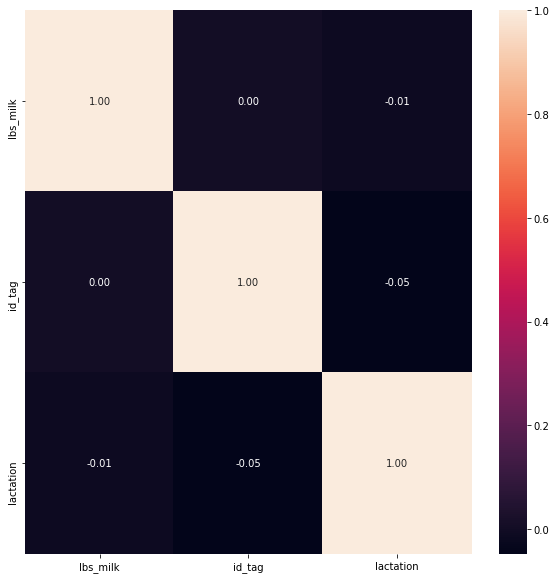

In [79]:
# Correlation Plot
plot_correlation_matrix_heat_map(data,'lbs_milk');
# None of the variables are highly correlated

#### Variance

In [80]:
data.var()

id_tag       8.287442e+06
lactation    2.126601e+00
lbs_milk     5.179369e+02
dtype: float64

#### Outliers
##### Boxplot

An exception occurred for column: group
An exception occurred for column: time


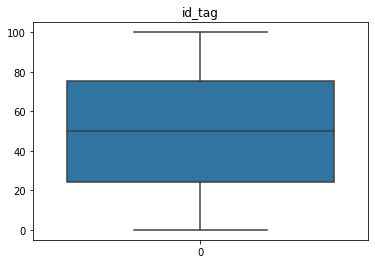

<Figure size 432x288 with 0 Axes>

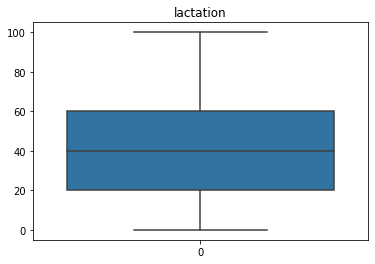

<Figure size 432x288 with 0 Axes>

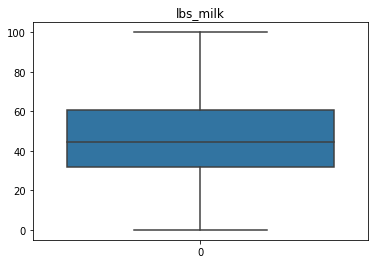

In [81]:
i = 1
for col in data.columns:
    plt.figure(i)
    try:
        sb.boxplot(data=((data[col]-data[col].min())/(data[col].max()-data[col].min()))*100).set_title(col)
    except:
        print("An exception occurred for column: {}".format(col))
    i+=1

# lbs_milk is the only variable that has some outliers, we will check z-scores to see how bad they are

##### Z_scores

In [82]:
numeric_cols = data.select_dtypes(exclude=[object])
zscores = numeric_cols.apply(zscore)
zscores.describe()

,id_tag,lactation,lbs_milk
count,7.440000e+02,7.440000e+02,7.440000e+02
mean,5.730183e-17,-1.169912e-16,-5.013910e-17
std,1.000673e+00,1.000673e+00,1.000673e+00
min,-1.733231e+00,-1.560546e+00,-2.295715e+00
25%,-8.851704e-01,-8.743483e-01,-6.997104e-01
50%,-6.346533e-03,-1.881509e-01,-6.507741e-02
75%,8.670895e-01,4.980465e-01,7.312754e-01
max,1.729228e+00,1.870441e+00,2.702843e+00


In [83]:
# Count the number of observations in each column that are above or below 3
zscores[(np.abs(zscores > 3))].count()
# No extreme outliers are found in the dataset

id_tag       0
lactation    0
lbs_milk     0
dtype: int64

#### Distributions  

An exception occurred for column: group
An exception occurred for column: time


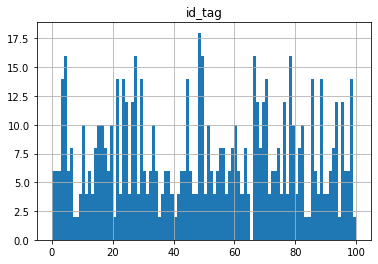

<Figure size 432x288 with 0 Axes>

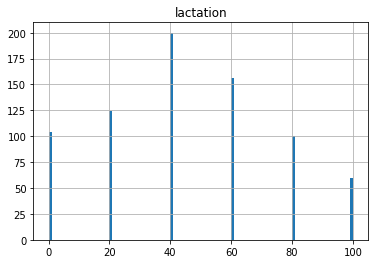

<Figure size 432x288 with 0 Axes>

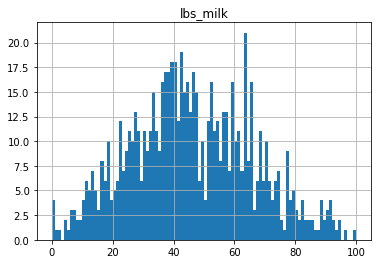

In [84]:
# Creating a histogram for each variable
i = 1
for col in data.columns:
    plt.figure(i)
    try:
        data2=((data[col]-data[col].min())/(data[col].max()-data[col].min()))*100
        data2.hist(bins=100)
        plt.title(col)
    except:
        print("An exception occurred for column: {}".format(col))
    
    i+=1
plt.show()
# lbs_milk appears to have a normal distribution, something we will check when doing t-tests

### Exploratory Plots

In [85]:
# Checking that the two groups had similar descriptive statistics prior to the feed change
before = data[(data.time == "before")]
before.groupby("group")[['lactation','lbs_milk']].describe().reset_index()
# The summary statistics are very similar for the two group. 
# The average lactation for both groups is just over 3.
# The average milk production for both groups is around 70 pounds(treatment is 70.67 & control is 70.69).
# This shows that both groups were fairly similar prior to the experiment.

group lactation                                              lbs_milk  \
                 count      mean       std  min  25%  50%  75%  max    count   
0    control     290.0  3.275862  1.447980  1.0  2.0  3.0  4.0  6.0    290.0   
1  treatment      82.0  3.268293  1.507584  1.0  2.0  3.0  4.0  6.0     82.0   

                                                                     \
        mean        std        min        25%        50%        75%   
0  70.685696  22.586631  19.695821  54.404518  68.594685  87.576986   
1  70.673106  22.762022  21.601491  58.666763  70.004174  84.070447   

               
          max  
0  128.925687  
1  126.971576

In [86]:
# Downselecting data to only the data from the after the feed was changed
df = data[(data.time == "after")]
df.groupby("group")[['lactation','lbs_milk']].describe().reset_index()
# From the descriptive statistics, it appears that the feed may have had an impact on the cows.
# The control group did not see their mean production change much, while the treatment group saw close to a 7 pound increase.

group lactation                                              lbs_milk  \
                 count      mean       std  min  25%  50%  75%  max    count   
0    control     290.0  3.275862  1.447980  1.0  2.0  3.0  4.0  6.0    290.0   
1  treatment      82.0  3.268293  1.507584  1.0  2.0  3.0  4.0  6.0     82.0   

                                                                     \
        mean        std        min        25%        50%        75%   
0  70.705413  22.792211  19.143847  54.304518  68.276555  88.013901   
1  76.702374  22.948929  27.817756  62.640494  77.161425  91.251929   

               
          max  
0  132.825686  
1  125.085610

In [87]:
def time_to_numeric(x):
      if x=='before': return 0
      if x=='after':   return 1

data['time_num'] = data['time'].apply(time_to_numeric)
print(data)

     id_tag      group  lactation    time    lbs_milk  time_num
0        22    control          5   after   65.987920         1
1        59    control          4   after   63.668600         1
2        90    control          2   after   78.158056         1
3       144    control          5   after   75.672886         1
4       193    control          1   after   99.385129         1
..      ...        ...        ...     ...         ...       ...
739    9572  treatment          1  before  126.971576         0
740    9804  treatment          5  before   81.648054         0
741    9815  treatment          3  before   46.122312         0
742    9840  treatment          2  before   34.573092         0
743    9879  treatment          4  before   40.693990         0

[744 rows x 6 columns]


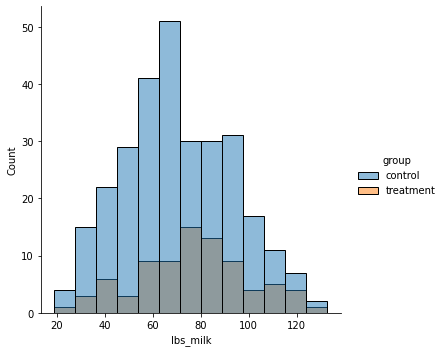

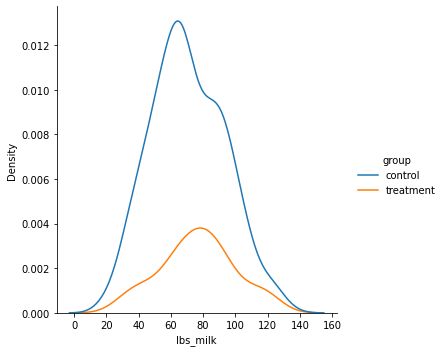

In [88]:
# Plotting the data
sb.displot(df, x="lbs_milk", hue="group");
sb.displot(df, x="lbs_milk", hue="group", kind="kde");
# The plots below show that the density for the treatment group's production skews towards higher production.
# This is another indication that the feed may have had its intended effect

### Two Sample T-test

In [89]:
# Splitting the groups for testing
control = df[(df.group == 'control')]
treat = df[(df.group == 'treatment')]

In [90]:
control = np.array(control.lbs_milk, dtype=float)
treat = np.array(treat.lbs_milk, dtype=float)

In [91]:
# Checking the variance of groups
print(np.var(control), np.var(treat))

517.6935469768109 520.2307626280179


In [92]:
stat, p = shapiro(control)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.991, p=0.070
Probably Gaussian


In [93]:
stat, p = shapiro(treat)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.985, p=0.449
Probably Gaussian


In [94]:
# Performing the t-test
ttest_ind(control, treat, equal_var=True)
# The p-value < 0.05

Ttest_indResult(statistic=-2.1005074968257498, pvalue=0.03636054012840316)

### Paired Sample T-test

In [95]:
# Splitting the time for testing for only the treatment group
before = data[(data.time == 'before') & (data.group == 'treatment')]
after = data[(data.time == 'after') & (data.group == 'treatment')]

In [96]:
before = np.array(before.lbs_milk, dtype=float)
after = np.array(after.lbs_milk, dtype=float)

In [97]:
# Checking the variance of groups
print(np.var(before), np.var(after))

511.7912354183079 520.2307626280179


In [98]:
stat, p = shapiro(before)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.990, p=0.786
Probably Gaussian


In [99]:
stat, p = shapiro(after)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.985, p=0.449
Probably Gaussian


In [100]:
# Performing the t-test
ttest_rel(before, after)
# The p-value < 0.05

Ttest_relResult(statistic=-9.629071310688566, pvalue=4.550531765263073e-15)

### Cost Benefit
* At the time of the experiment, the cost of feed per ton was \\$325  
* The extra cost of the feed additive was \\$50 dollars per ton
* The price of milk per hundredweight(cwt) is \\$15.00
* A single cow will eat approximately 25 lbs of feed per day
* From our results, the average cow that received the feed additive produced approximately 6 more lbs per day

In [101]:
# The difference in price per cow per day of feed
cost_before = ((325/2000) * 25)
print(f"Feed cost per day - no additive: {cost_before}")
cost_after = (((325+50)/2000) * 25)
print(f"Feed cost per day - with additive: {cost_after}")
extra_cost = (cost_after-cost_before)
print(f"The additional cost per cow per day for the new feed is {extra_cost} dollars")

Feed cost per day - no additive: 4.0625
Feed cost per day - with additive: 4.6875
The additional cost per cow per day for the new feed is 0.625 dollars


In [108]:
# Calculate the increase in the milk check per cow per day
extra_rev = round((15/100) * 6,2)
print(f'The additional revenue per cow per day for the new feed is {extra_rev} dollars')

The additional revenue per cow per day for the new feed is 0.9 dollars


In [112]:
# The difference between the extra cost and the extra revenue
diff = round(extra_rev - extra_cost,2)
print(f'The cost benefit is {diff} dollars')
if diff > 0:
    print('The farmer should pay for the new feed additive')
else:
    print('The farmer should stay with the current feed')

The cost benefit is 0.28 dollars
The farmer should pay for the new feed additive


In [113]:
monthly = round((diff*372)*30,2)
print(f'The increased revenue for an entire month is ${monthly}')

The increased revenue for an entire month is $3124.8


## Experiment Outcomes

### Hypothesis Testing

- Two Sample T-test: The result for the t-test returned a p-value of 0.0364. Since the p-value < 0.05, I can reject the null hypothesis that the two feeds were the same. I have shown that the difference in milk production between the control and treatment groups is statistically significant.
- Paired Sample T-test: I thought it might be fun to do a paired t-test since I had the data available in this dataset already. The result of this test returned a p-value of 0.000. The p-value is once again less than 0.05, so I can say that it is statistically significant at the 5% level. In addition, the p-value < 0.01, so I can affirmatively reject the null hypothesis that the two feeds were the same at both the 1% and 5% significance level. The difference in milk production from the two time periods within the treatment group is statistically significant. 
- The results of both tests confirm that the new feed has a positive, statistically significant impact on the milk production of the cows!

### Cost-Benefit Analysis

 - The result of the simplified cost-benefit analysis show that there is an increase in revenue of 0.28 dollars per day per cow for the farm if they utilize the new feed. While that may not seem like a lot of money, it becomes a fairly large amount when spread across the entire herd for an entire month. As shown above, the increased revenue for an entire month when using the new feed over the old feed is approximately \\$3,100.

### Final Decision

**Decision:** The dairy farm **should** switch to the new feed with the additive. While expenses will increase slightly, the increase in revenue far outweights the increased price for the feed.